In [352]:
from plotnine import ggplot, geom_histogram, aes, stat_bin, facet_wrap, geom_point, theme, element_text, geom_col, geom_segment, coord_flip,  scale_x_discrete, scale_y_discrete, geom_point

In [2]:
import pandas as pd 

In [91]:
!pip install numpy

In [3]:
per_game_df = pd.read_csv('data/player_game.csv')

In [4]:
per_game_df.columns

Index(['Unnamed: 0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'season'],
      dtype='object')

In [5]:
per_game_df.dtypes

Unnamed: 0      int64
Player         object
Pos            object
Age             int64
Tm             object
G               int64
GS            float64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
season        float64
dtype: object

In [6]:
per_game_df['season'] = per_game_df['season'].astype('category')

In [7]:
per_game_df[per_game_df['eFG%'].isna()][:][['Player','eFG%','season']] ## show NaN for efg% 

,Player,eFG%,season
2146,Matt Guokas,NaN,1971.0
2384,Shaler Halimon,NaN,1972.0
2597,Roger Brown,NaN,1973.0
2748,Luther Rackley,NaN,1973.0
3009,Mike Ratliff,NaN,1974.0
...,...,...,...
27030,Chris Silva,NaN,2022.0
27163,Moses Wright,NaN,2022.0
27262,Moses Brown,NaN,2023.0
27369,Michael Foster Jr.,NaN,2023.0


In [8]:
per_game_df_ft = per_game_df[per_game_df.FTA>0.0]

In [9]:
per_game_df_ft_fga = per_game_df_ft[per_game_df.FGA >0.0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [10]:
len(per_game_df_ft_fga[per_game_df_ft_fga['eFG%'].isna()])

0

In [11]:
len(per_game_df_ft_fga[per_game_df_ft_fga['season'].isna()])

0

/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 267'. Pick better value with 'binwidth'.


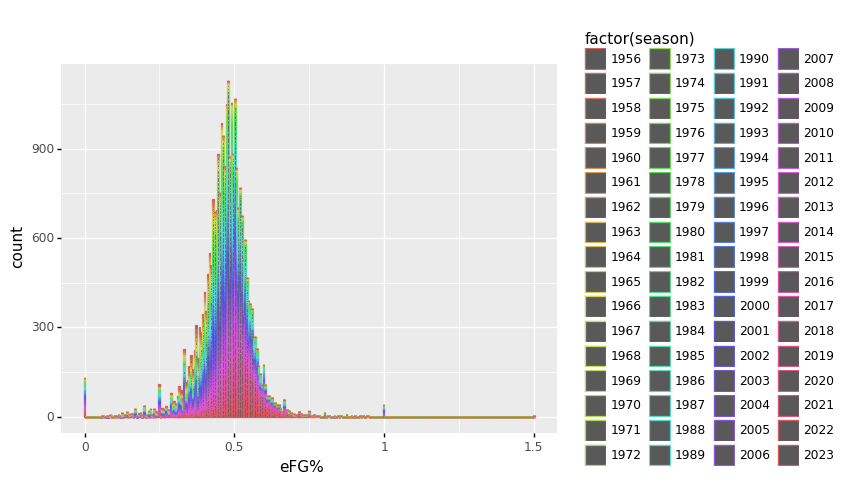

<ggplot: (8781177737077)>

In [13]:
(ggplot(per_game_df_ft_fga, aes(x='eFG%', color="factor(season)")) + geom_histogram())

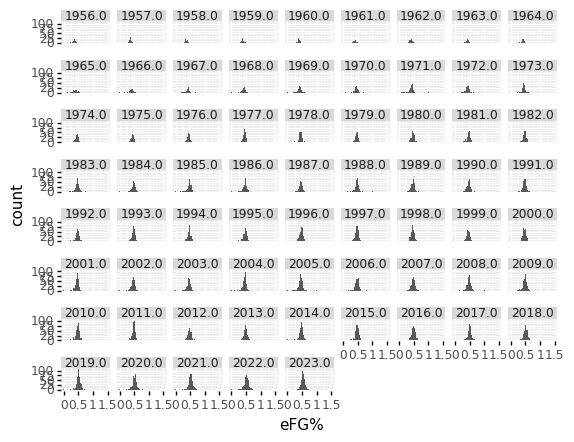

<ggplot: (8781177938145)>

In [26]:
(ggplot(per_game_df_ft_fga, aes(x='eFG%')) + geom_histogram(binwidth=0.02) + facet_wrap('season'))

/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 267'. Pick better value with 'binwidth'.


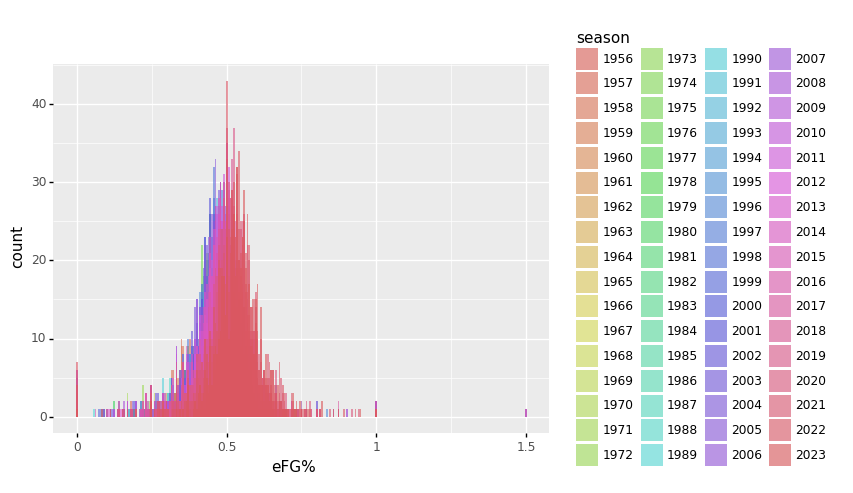

<ggplot: (8781181320297)>

In [29]:
(ggplot(per_game_df_ft_fga, aes(x='eFG%', fill= 'season')) + geom_histogram(alpha=0.6, position='identity'))

In [102]:
seasons = [1959, 2023]

In [103]:
few_seasons_data = per_game_df_ft_fga[per_game_df_ft_fga['season'].isin(seasons)]

In [104]:
few_seasons_data['season'] = few_seasons_data['season'].cat.remove_unused_categories()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [105]:
few_seasons_data['season'].value_counts()

2023.0    642
1959.0    107
Name: season, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 45'. Pick better value with 'binwidth'.


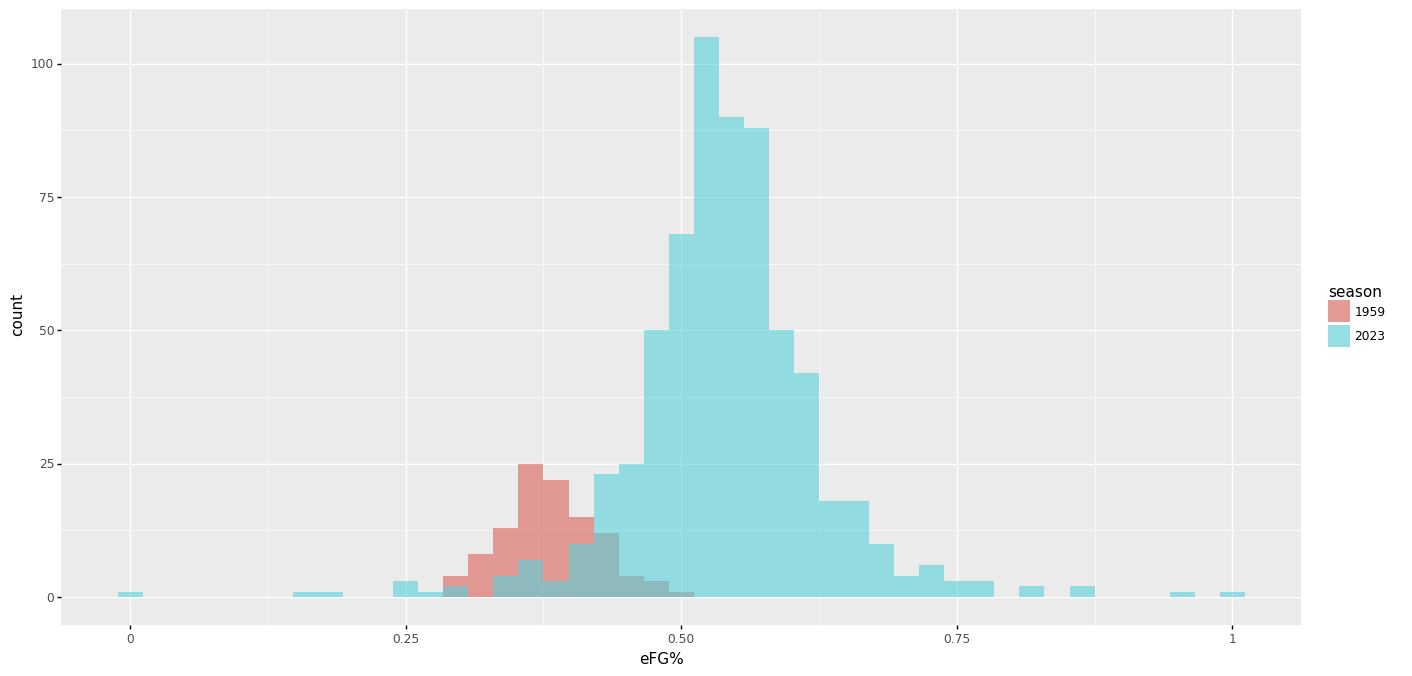

<ggplot: (8782626162961)>

In [129]:
(ggplot(few_seasons_data, aes(x='eFG%', fill= 'season')) + geom_histogram(alpha=0.6, position='identity')+theme(figure_size=(16, 8)))

In [95]:
few_seasons_data.groupby('season')['eFG%'].mean()

season
2010.0    0.479066
2023.0    0.540003
Name: eFG%, dtype: float64

In [110]:
few_seasons_data.groupby('season')['eFG%'].std()

season
1959.0    0.042577
2023.0    0.085896
Name: eFG%, dtype: float64

In [115]:
efg_mean = per_game_df_ft_fga.groupby('season')['eFG%'].mean().reset_index()

In [101]:
per_game_df_ft_fga.groupby('season')['eFG%'].std()

season
1956.0    0.063613
1957.0    0.048988
1958.0    0.062861
1959.0    0.042577
1960.0    0.069816
            ...   
2019.0    0.083708
2020.0    0.095344
2021.0    0.096922
2022.0    0.101274
2023.0    0.085896
Name: eFG%, Length: 68, dtype: float64

In [267]:
efg_mean

,season,eFG%_avg
0,1956.0,0.367132
1,1957.0,0.360536
2,1958.0,0.358185
3,1959.0,0.382056
4,1960.0,0.393192
...,...,...
63,2019.0,0.505590
64,2020.0,0.514744
65,2021.0,0.516320
66,2022.0,0.511966


In [265]:
efg_mean = efg_mean.rename(columns = {'eFG%':'eFG%_avg'})

In [266]:
efg_mean

,season,eFG%_avg
0,1956.0,0.367132
1,1957.0,0.360536
2,1958.0,0.358185
3,1959.0,0.382056
4,1960.0,0.393192
...,...,...
63,2019.0,0.505590
64,2020.0,0.514744
65,2021.0,0.516320
66,2022.0,0.511966


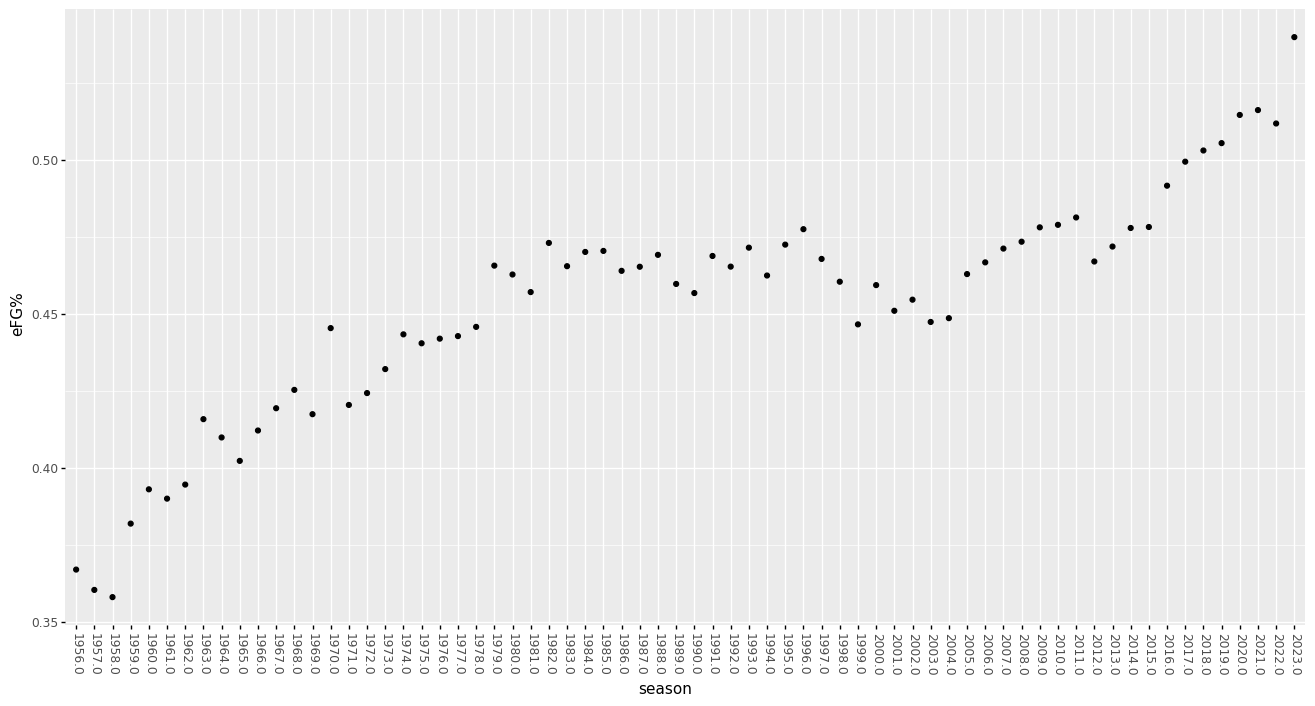

<ggplot: (8782599738729)>

In [127]:
(ggplot(efg_mean, aes(x='season', y='eFG%')) + geom_point() +theme(figure_size=(16, 8), axis_text_x = element_text(rotation=270)))

In [130]:
nba_mvp =  pd.read_csv('data/nba_mvp.csv')

In [131]:
nba_mvp.head()

,Unnamed: 0,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,0,2022-23,NBA,Joel Embiid,(V),28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259
1,1,2021-22,NBA,Nikola Jokić,(V),26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296
2,2,2020-21,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301
3,3,2019-20,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
4,4,2018-19,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292


In [132]:
nba_mvp.tail()

,Unnamed: 0,Season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
63,63,1959-60,NBA,Wilt Chamberlain,(V),23,PHW,72,46.4,37.6,27.0,2.3,NaN,NaN,0.461,NaN,0.582,17.0,0.245
64,64,1958-59,NBA,Bob Pettit,(V),26,STL,72,39.9,29.2,16.4,3.1,NaN,NaN,0.438,NaN,0.759,14.8,0.246
65,65,1957-58,NBA,Bill Russell,(V),23,BOS,69,38.3,16.6,22.7,2.9,NaN,NaN,0.442,NaN,0.519,11.3,0.206
66,66,1956-57,NBA,Bob Cousy,(V),28,BOS,64,36.9,20.6,4.8,7.5,NaN,NaN,0.378,NaN,0.821,8.8,0.178
67,67,1955-56,NBA,Bob Pettit,(V),23,STL,72,38.8,25.7,16.2,2.6,NaN,NaN,0.429,NaN,0.736,13.8,0.236


In [133]:
nba_mvp.dtypes

Unnamed: 0      int64
Season         object
Lg             object
Player         object
Voting         object
Age             int64
Tm             object
G               int64
MP            float64
PTS           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
FG%           float64
3P%           float64
FT%           float64
WS            float64
WS/48         float64
dtype: object

In [134]:
per_game_df_ft_fga.columns

Index(['Unnamed: 0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'season'],
      dtype='object')

In [141]:
nba_mvp = nba_mvp.rename(columns ={'Season':'season'})

In [147]:
nba_mvp.dtypes

Unnamed: 0      int64
season         object
Lg             object
Player         object
Voting         object
Age             int64
Tm             object
G               int64
MP            float64
PTS           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
FG%           float64
3P%           float64
FT%           float64
WS            float64
WS/48         float64
dtype: object

In [148]:
nba_mvp.head()

,Unnamed: 0,season,Lg,Player,Voting,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,0,2022-23,NBA,Joel Embiid,(V),28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259
1,1,2021-22,NBA,Nikola Jokić,(V),26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296
2,2,2020-21,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301
3,3,2019-20,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
4,4,2018-19,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292


In [151]:
per_game_df_ft_fga.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,0,Paul Arizin*,SF,27,PHW,72,NaN,37.8,8.6,19.1,...,NaN,NaN,7.5,2.6,NaN,NaN,NaN,3.9,24.2,1956.0
1,1,Jesse Arnelle,PF,22,FTW,31,NaN,13.2,1.7,5.3,...,NaN,NaN,5.5,0.6,NaN,NaN,NaN,1.9,4.7,1956.0
2,2,Dick Atha,SG,24,NYK,25,NaN,11.5,1.4,3.5,...,NaN,NaN,1.7,1.3,NaN,NaN,NaN,1.6,3.7,1956.0
3,3,Jim Baechtold,SF,28,NYK,70,NaN,24.8,3.8,9.9,...,NaN,NaN,3.1,2.3,NaN,NaN,NaN,2.2,11.0,1956.0
4,4,Ernie Barrett,SG,26,BOS,72,NaN,20.2,2.9,7.4,...,NaN,NaN,3.4,2.4,NaN,NaN,NaN,2.6,7.0,1956.0


In [143]:
nba_mvp.columns

Index(['Unnamed: 0', 'season', 'Lg', 'Player', 'Voting', 'Age', 'Tm', 'G',
       'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48'],
      dtype='object')

In [153]:
nba_mvp.dtypes

Unnamed: 0      int64
season         object
Lg             object
Player         object
Voting         object
Age             int64
Tm             object
G               int64
MP            float64
PTS           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
FG%           float64
3P%           float64
FT%           float64
WS            float64
WS/48         float64
dtype: object

In [206]:
nba_mvp['season'] = nba_mvp['season'].str.split('-').str[0].astype('int64') +1

In [223]:
nba_mvp['season']

0     2023
1     2022
2     2021
3     2020
4     2019
      ... 
63    1960
64    1959
65    1958
66    1957
67    1956
Name: season, Length: 68, dtype: int64

In [237]:
nba_mvp['Player'].head(20)

0               Joel Embiid
1              Nikola Jokić
2              Nikola Jokić
3     Giannis Antetokounmpo
4     Giannis Antetokounmpo
5              James Harden
6         Russell Westbrook
7             Stephen Curry
8             Stephen Curry
9              Kevin Durant
10             LeBron James
11             LeBron James
12             Derrick Rose
13             LeBron James
14             LeBron James
15              Kobe Bryant
16            Dirk Nowitzki
17               Steve Nash
18               Steve Nash
19            Kevin Garnett
Name: Player, dtype: object

In [248]:
per_game_df_ft_fga['Player'] = per_game_df_ft_fga['Player'].str.replace('*','')    #fix a strings player name 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [250]:
nba_mvp_pg = pd.merge(nba_mvp, per_game_df_ft_fga, how='inner', on =['season', 'Player'])

In [251]:
per_game_df_ft_fga[(per_game_df_ft_fga.season == 2008) & (per_game_df_ft_fga.Player == 'Kobe Bryant')]

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
17776,3448,Kobe Bryant,SG,29,LAL,82,82.0,38.9,9.5,20.6,...,1.1,5.2,6.3,5.4,1.8,0.5,3.1,2.8,28.3,2008.0


In [252]:
nba_mvp_pg = nba_mvp_pg.sort_values('season')

In [253]:
nba_mvp_pg['season']

67    1956
66    1957
65    1958
64    1959
63    1960
      ... 
4     2019
3     2020
2     2021
1     2022
0     2023
Name: season, Length: 68, dtype: object

In [256]:
nba_mvp_pg

,Unnamed: 0_x,season,Lg,Player,Voting,Age_x,Tm_x,G_x,MP_x,PTS_x,...,FT%_y,ORB,DRB,TRB_y,AST_y,STL_y,BLK_y,TOV,PF,PTS_y
67,67,1956,NBA,Bob Pettit,(V),23,STL,72,38.8,25.7,...,0.736,NaN,NaN,16.2,2.6,NaN,NaN,NaN,2.8,25.7
66,66,1957,NBA,Bob Cousy,(V),28,BOS,64,36.9,20.6,...,0.821,NaN,NaN,4.8,7.5,NaN,NaN,NaN,2.1,20.6
65,65,1958,NBA,Bill Russell,(V),23,BOS,69,38.3,16.6,...,0.519,NaN,NaN,22.7,2.9,NaN,NaN,NaN,2.6,16.6
64,64,1959,NBA,Bob Pettit,(V),26,STL,72,39.9,29.2,...,0.759,NaN,NaN,16.4,3.1,NaN,NaN,NaN,2.8,29.2
63,63,1960,NBA,Wilt Chamberlain,(V),23,PHW,72,46.4,37.6,...,0.582,NaN,NaN,27.0,2.3,NaN,NaN,NaN,2.1,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2019,NBA,Giannis Antetokounmpo,(V),24,MIL,72,32.8,27.7,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
3,3,2020,NBA,Giannis Antetokounmpo,(V),25,MIL,63,30.4,29.5,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5
2,2,2021,NBA,Nikola Jokić,(V),25,DEN,72,34.6,26.4,...,0.868,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4
1,1,2022,NBA,Nikola Jokić,(V),26,DEN,74,33.5,27.1,...,0.810,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1


In [255]:
nba_mvp_pg.columns

Index(['Unnamed: 0_x', 'season', 'Lg', 'Player', 'Voting', 'Age_x', 'Tm_x',
       'G_x', 'MP_x', 'PTS_x', 'TRB_x', 'AST_x', 'STL_x', 'BLK_x', 'FG%_x',
       '3P%_x', 'FT%_x', 'WS', 'WS/48', 'Unnamed: 0_y', 'Pos', 'Age_y', 'Tm_y',
       'G_y', 'GS', 'MP_y', 'FG', 'FGA', 'FG%_y', '3P', '3PA', '3P%_y', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%_y', 'ORB', 'DRB', 'TRB_y',
       'AST_y', 'STL_y', 'BLK_y', 'TOV', 'PF', 'PTS_y'],
      dtype='object')

In [258]:
len(nba_mvp_pg)

68

In [268]:
nba_mvp_efg = nba_mvp_pg.merge(efg_mean, how='left', on= 'season')

In [298]:
nba_mvp_efg.head()

,Unnamed: 0_x,season,Lg,Player,Voting,Age_x,Tm_x,G_x,MP_x,PTS_x,...,DRB,TRB_y,AST_y,STL_y,BLK_y,TOV,PF,PTS_y,eFG%_avg,diff
0,67,1956,NBA,Bob Pettit,(V),23,STL,72,38.8,25.7,...,NaN,16.2,2.6,NaN,NaN,NaN,2.8,25.7,0.367132,0.061868
1,66,1957,NBA,Bob Cousy,(V),28,BOS,64,36.9,20.6,...,NaN,4.8,7.5,NaN,NaN,NaN,2.1,20.6,0.360536,0.017464
2,65,1958,NBA,Bill Russell,(V),23,BOS,69,38.3,16.6,...,NaN,22.7,2.9,NaN,NaN,NaN,2.6,16.6,0.358185,0.083815
3,64,1959,NBA,Bob Pettit,(V),26,STL,72,39.9,29.2,...,NaN,16.4,3.1,NaN,NaN,NaN,2.8,29.2,0.382056,0.055944
4,63,1960,NBA,Wilt Chamberlain,(V),23,PHW,72,46.4,37.6,...,NaN,27.0,2.3,NaN,NaN,NaN,2.1,37.6,0.393192,0.067808


In [270]:
nba_mvp_efg.columns

Index(['Unnamed: 0_x', 'season', 'Lg', 'Player', 'Voting', 'Age_x', 'Tm_x',
       'G_x', 'MP_x', 'PTS_x', 'TRB_x', 'AST_x', 'STL_x', 'BLK_x', 'FG%_x',
       '3P%_x', 'FT%_x', 'WS', 'WS/48', 'Unnamed: 0_y', 'Pos', 'Age_y', 'Tm_y',
       'G_y', 'GS', 'MP_y', 'FG', 'FGA', 'FG%_y', '3P', '3PA', '3P%_y', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%_y', 'ORB', 'DRB', 'TRB_y',
       'AST_y', 'STL_y', 'BLK_y', 'TOV', 'PF', 'PTS_y', 'eFG%_avg'],
      dtype='object')

In [303]:
nba_mvp_efg['diff'] = nba_mvp_efg['eFG%'] - nba_mvp_efg['eFG%_avg']

In [304]:
nba_mvp_efg['diff']

0     0.061868
1     0.017464
2     0.083815
3     0.055944
4     0.067808
        ...   
63    0.093410
64    0.074256
65    0.085680
66    0.108034
67    0.032997
Name: diff, Length: 68, dtype: float64

In [312]:
nba_mvp_efg['player_u']= nba_mvp_efg['Player'].str.cat(nba_mvp_efg['season'].astype(str), sep ="_")

In [326]:
nba_players_list = nba_mvp_efg.sort_values('diff')['player_u'].tolist()

In [314]:
nba_mvp_efg['player_u']

61      Russell Westbrook_2017
45          Allen Iverson_2001
55           Derrick Rose_2011
42         Michael Jordan_1998
7            Bill Russell_1963
                ...           
24    Kareem Abdul-Jabbar_1980
16    Kareem Abdul-Jabbar_1972
15    Kareem Abdul-Jabbar_1971
12       Wilt Chamberlain_1968
11       Wilt Chamberlain_1967
Name: player_u, Length: 68, dtype: object

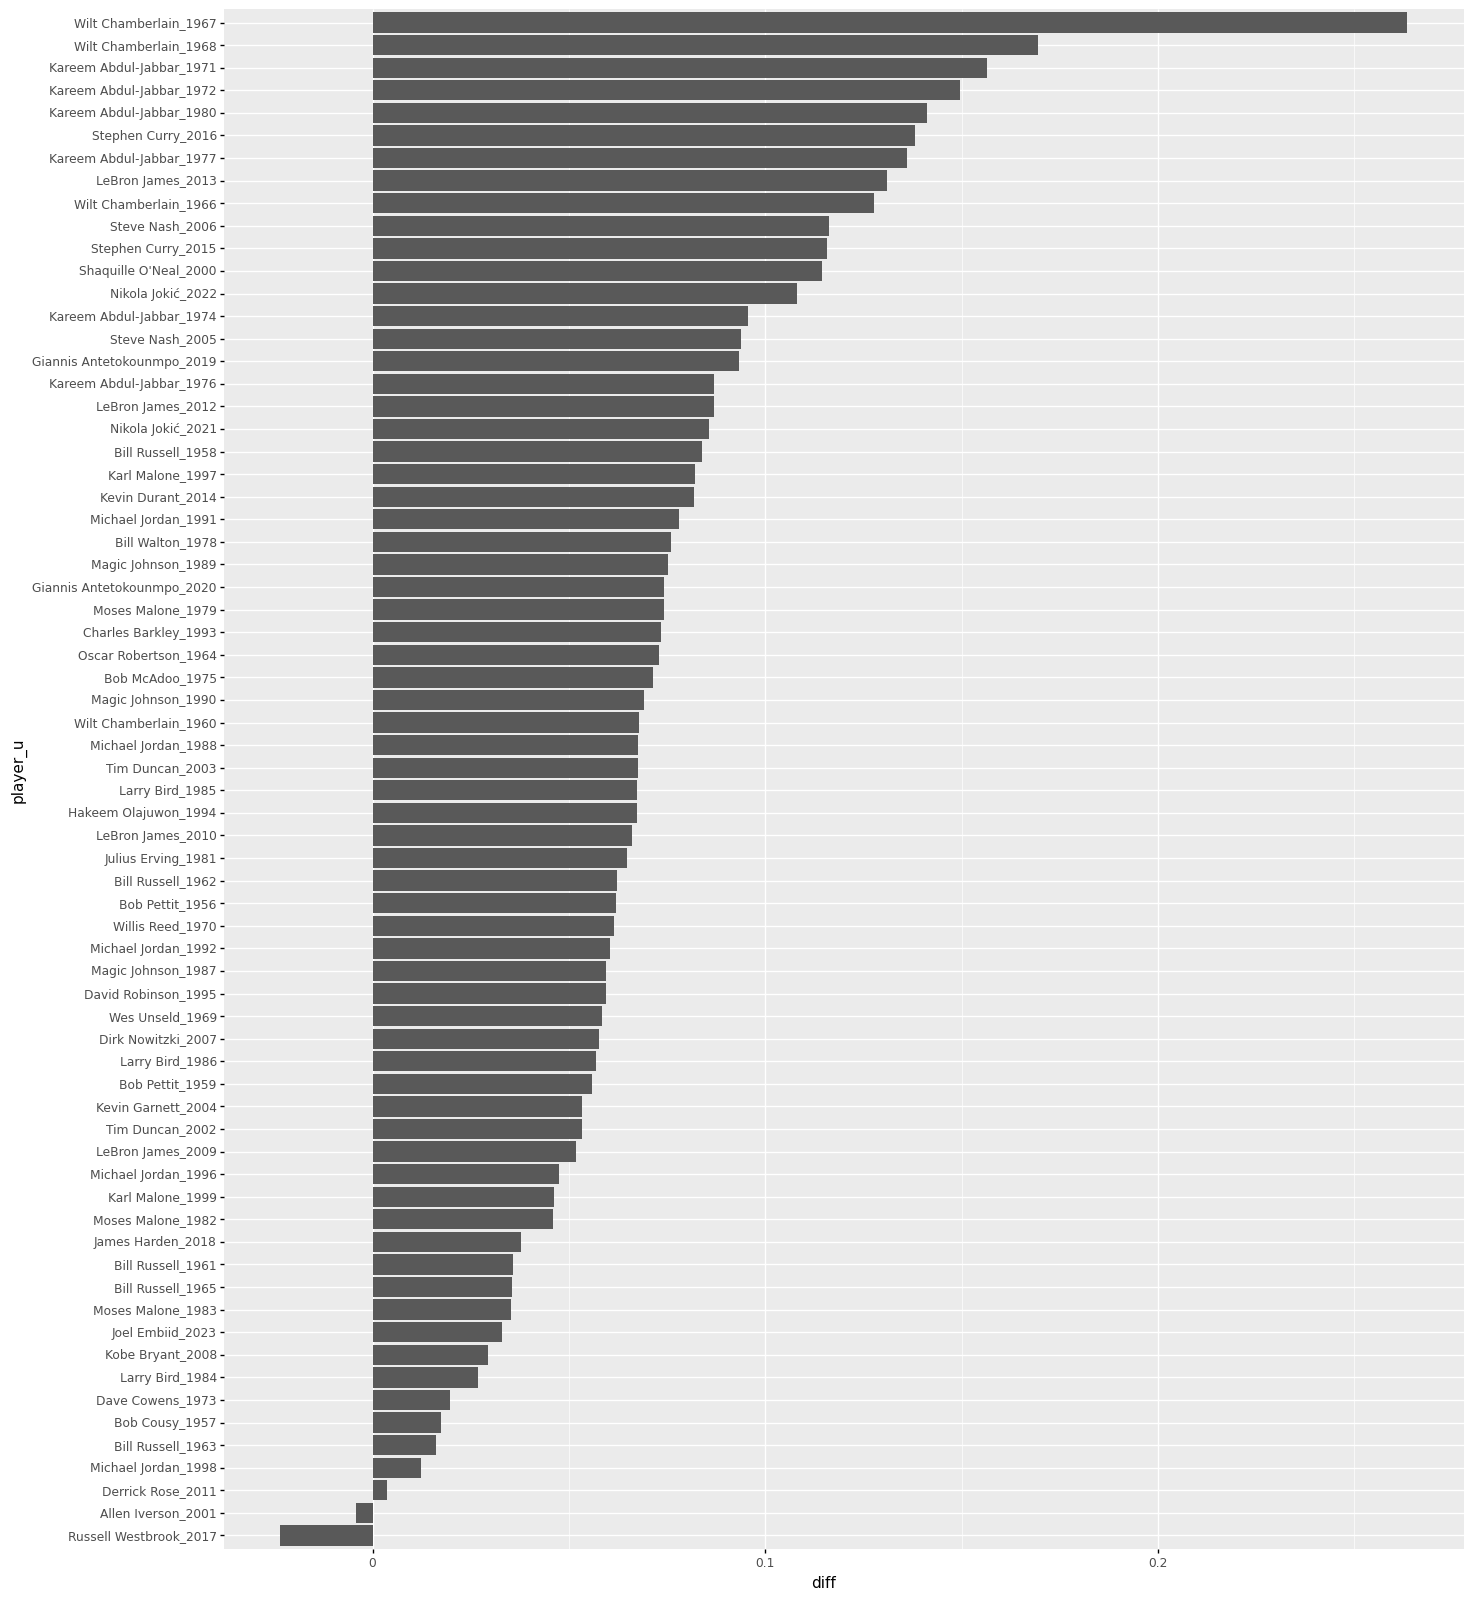

<ggplot: (8782599735397)>

In [332]:
(ggplot(nba_mvp_efg, aes('player_u', 'diff')) + geom_col()+ scale_x_discrete(limits=nba_players_list)+ coord_flip()) + theme(figure_size=(16, 20))

In [355]:
nba_players_efg_list = nba_mvp_efg.sort_values('eFG%_avg')['player_u'].tolist()

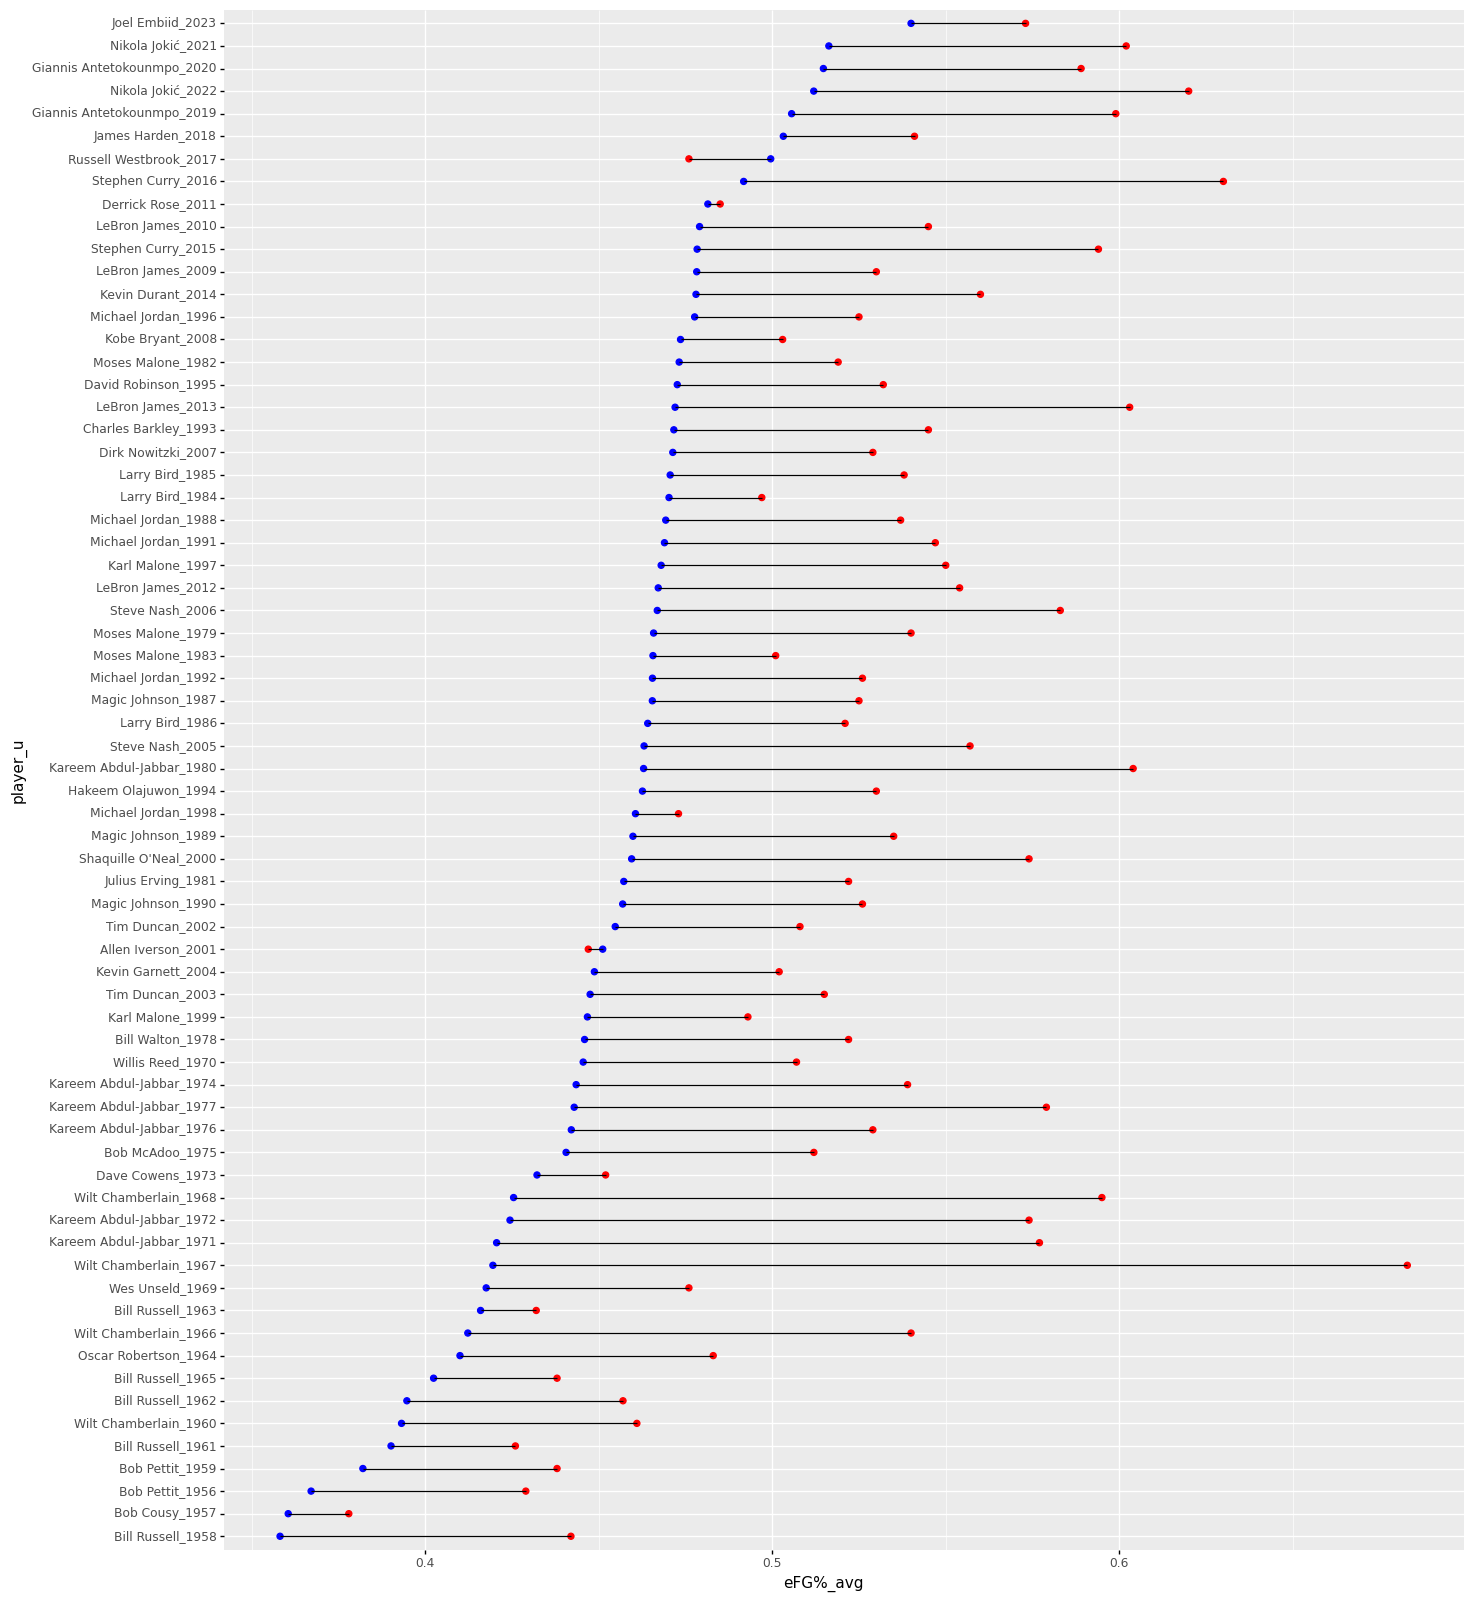

<ggplot: (8782599686413)>

In [356]:
(ggplot(nba_mvp_efg, aes(y = 'player_u')) + geom_point(aes(x = 'eFG%_avg'), color='blue', size=2) + 
 geom_point(aes(x = 'eFG%'), color='red', size=2) + 
 geom_segment(aes(x='eFG%_avg', xend='eFG%', y= 'player_u', yend='player_u'))+
 scale_y_discrete(limits=nba_players_efg_list) + 
 theme(figure_size=(16, 20)))

In [357]:
season_2001 = per_game_df_ft_fga[(per_game_df_ft_fga.season == 2001)]

In [362]:
season_2001_iverson = season_2001[(season_2001.Player =='Allen Iverson')]

In [364]:
len(season_2001_iverson)

1

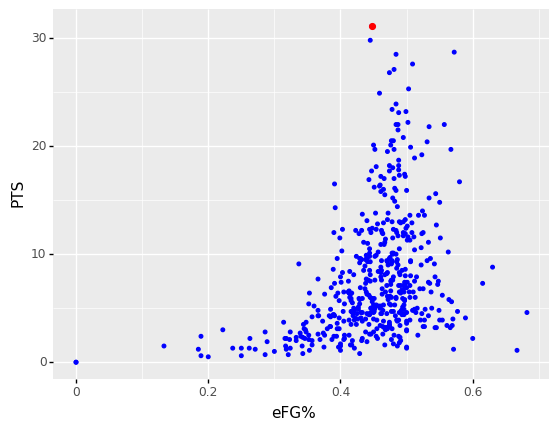

<ggplot: (8782598430869)>

In [369]:
(ggplot(season_2001, aes(y = 'PTS', x = 'eFG%')) + geom_point(color='blue', size=1) +
 geom_point(season_2001_iverson, color='red', size=1.9)
)